In [401]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
import missingno as msno
# Set the option to display all rows
#pd.set_option('display.max_rows', None)
import re

In [402]:
df = pd.read_csv(r'C:\Users\dhami\Downloads\GitHub_Capstone_Project\CTREA-Dynamics\data\Real_Estate_Sales_2001-2020_GL.csv')
df.shape

C:\Users\dhami\AppData\Local\Temp\ipykernel_22480\1589272176.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\dhami\Downloads\GitHub_Capstone_Project\CTREA-Dynamics\data\Real_Estate_Sales_2001-2020_GL.csv')


(997213, 14)

In [403]:
df.drop('Serial Number', axis=1, inplace=True)

In [404]:
#based on data assessment, we found 10 percent may losss due to IQR method
def detect_outliers(data):
    numeric_data = data.select_dtypes(exclude='object')
    columns = list(numeric_data.columns)
    outliers_info = []

    for column in columns:
        # IQR method
        q1 = numeric_data[column].quantile(0.25)
        q3 = numeric_data[column].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        # Detect outliers
        outliers = (numeric_data[column] < lower_limit) | (numeric_data[column] > upper_limit)

        # Count the number of outliers
        num_outliers = outliers.sum()
        percentage_outliers = round((outliers.sum()/numeric_data.shape[0]) * 100,2)

        # Append information to the list
        outliers_info.append({
            'Column': column,
            'Lower Limit': lower_limit,
            'Upper Limit': upper_limit,
            'Num Outliers': num_outliers,
            'Outlier Indices': numeric_data[outliers].index.tolist(),
            'Outliers_percentage' : percentage_outliers
        })

    # Convert the list of dictionaries to a DataFrame
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# Example usage
outliers_df = detect_outliers(df)
outliers_df


,Column,Lower Limit,Upper Limit,Num Outliers,Outlier Indices,Outliers_percentage
0,List Year,1986.000000,2034.00000,0,[],0.00
1,Assessed Value,-119340.000000,432500.00000,90623,"[3, 4, 5, 8, 12, 13, 35, 40, 55, 74, 82, 84, 8...",9.09
2,Sale Amount,-197500.000000,702500.00000,82900,"[3, 4, 5, 8, 33, 35, 40, 44, 55, 74, 82, 84, 8...",8.31
3,Sales Ratio,0.038836,1.23314,100129,"[6, 32, 50, 60, 75, 86, 94, 96, 127, 133, 139,...",10.04


In [405]:
lower_limit = outliers_df.iloc[3,1]
upper_limit = outliers_df.iloc[3,2]
(lower_limit,upper_limit)

(0.03883588900000007, 1.2331401849999999)

In [406]:
data = df[(df['Sales Ratio'] > lower_limit) & (df['Sales Ratio'] < upper_limit)]
data.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [407]:
data.shape

(897084, 13)

In [408]:
round(data.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
List Year,897084.0,NaN,NaN,NaN,2010.15,6.32,2001.0,2004.0,2010.0,2016.0,2020.0
Date Recorded,897084,6313,07/01/2005,840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Town,897084,170,Stamford,30139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,897070,665089,MULTI ADDRESSES,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assessed Value,897084.0,NaN,NaN,NaN,234248.08,751951.6,70.0,89510.0,140410.0,226900.0,142858700.0
Sale Amount,897084.0,NaN,NaN,NaN,402345.88,1610323.16,300.0,158000.0,240000.0,380000.0,395500000.0
Sales Ratio,897084.0,NaN,NaN,NaN,0.62,0.21,0.04,0.48,0.61,0.73,1.23
Property Type,554579,11,Single Family,364047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residential Type,549989,5,Single Family,406206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Non Use Code,193673,103,25 - Other,42263,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
outliers_df_1 = detect_outliers(data)
outliers_df_1

,Column,Lower Limit,Upper Limit,Num Outliers,Outlier Indices,Outliers_percentage
0,List Year,1986.000000,2034.00000,0,[],0.00
1,Assessed Value,-116575.000000,432985.00000,77611,"[3, 4, 5, 8, 12, 13, 35, 40, 55, 74, 82, 84, 8...",8.65
2,Sale Amount,-175000.000000,713000.00000,78242,"[3, 4, 5, 8, 33, 35, 40, 44, 55, 74, 82, 84, 8...",8.72
3,Sales Ratio,0.100224,1.11296,25770,"[69, 283, 370, 379, 383, 574, 628, 654, 701, 7...",2.87


In [410]:
data.shape

(897084, 13)

In [411]:
data['Non Use Code'].unique()

array([nan, '14 - Foreclosure', '25 - Other', '01 - Family',
       '12 - Non Buildable Lot', '7', '24', '07 - Change in Property',
       '1', '17', '6', '24 - Plottage', '28 - Use Assessment', '09 - Tax',
       '18 - In Lieu Of Foreclosure', '17 - Two Towns', '10 - A Will',
       '06 - Portion of Property', '08 - Part Interest',
       '15 - Government Agency', '16 - Charitable Group',
       '11 - Court Order', '26 - Rehabilitation Deferred',
       '03 - Inter Corporation', '22 - Money and Personal Property',
       'Single Family', '04 - Correcting Deed', '05 - Deed Date',
       '27 - CRUMBLING FOUNDATION ASSESSMENT REDUCTION', '13 - Bankrupcy',
       '30 - Auction', '02 - Love and Affection',
       '21 - Personal Property Exchange', '23 - Zoning', '14', '25', '3',
       '20 - Cemetery', '8', '19 - Easement', '28', '10', '12', '15',
       '21', '16', '11', '18', '13', '4', '19', '22', '2', '23', '30',
       '9', '5', '26', '27', 7.0, 8.0, 13.0, 6.0, 25.0, 28.0, 10.0, 27.0,

In [412]:

# Split the 'Non Use Code' column
split_data = data['Non Use Code'].astype(str).str.split('-', n=1, expand=True)

# Create 'Number' and 'Word' columns based on the split
data['Number'] = np.where(split_data[1].isnull(), split_data[0], split_data[0])
data['Word'] = split_data[1]

# Display the modified DataFrame
#print(data.head())


C:\Users\dhami\AppData\Local\Temp\ipykernel_22480\3428283491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Number'] = np.where(split_data[1].isnull(), split_data[0], split_data[0])
C:\Users\dhami\AppData\Local\Temp\ipykernel_22480\3428283491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Word'] = split_data[1]


In [413]:
data[['Non Use Code', 'Number','Word']].sample(20)

,Non Use Code,Number,Word
526939,07 - Change in Property,07,Change in Property
97107,NaN,nan,None
305889,NaN,nan,None
695957,24 - Plottage,24,Plottage
422316,25 - Other,25,Other
316702,NaN,nan,None
443030,NaN,nan,None
672784,25 - Other,25,Other
689650,NaN,nan,None
504620,NaN,nan,None


In [414]:
data['Number'].unique()

array(['nan', '14 ', '25 ', '01 ', '12 ', '7', '24', '07 ', '1', '17',
       '6', '24 ', '28 ', '09 ', '18 ', '17 ', '10 ', '06 ', '08 ', '15 ',
       '16 ', '11 ', '26 ', '03 ', '22 ', 'Single Family', '04 ', '05 ',
       '27 ', '13 ', '30 ', '02 ', '21 ', '23 ', '14', '25', '3', '20 ',
       '8', '19 ', '28', '10', '12', '15', '21', '16', '11', '18', '13',
       '4', '19', '22', '2', '23', '30', '9', '5', '26', '27', '7.0',
       '8.0', '13.0', '6.0', '25.0', '28.0', '10.0', '27.0', '11.0',
       '14.0', '17.0', '1.0', '16.0', '3.0', '4.0', '24.0', '18.0', '2.0',
       '15.0', '29.0', '22.0', '30.0', '21.0', '5.0', '12.0', '23.0',
       '9.0', '19.0', '20.0', '26.0', '68.0', '31.0', '73.0', '38.0',
       '37.0', '55.0', '32.0', '29', '88', '37', '31', '34', '74', '32',
       '29 '], dtype=object)

In [415]:
data['Word'].unique()

array([None, ' Foreclosure', ' Other', ' Family', ' Non Buildable Lot',
       ' Change in Property', ' Plottage', ' Use Assessment', ' Tax',
       ' In Lieu Of Foreclosure', ' Two Towns', ' A Will',
       ' Portion of Property', ' Part Interest', ' Government Agency',
       ' Charitable Group', ' Court Order', ' Rehabilitation Deferred',
       ' Inter Corporation', ' Money and Personal Property',
       ' Correcting Deed', ' Deed Date',
       ' CRUMBLING FOUNDATION ASSESSMENT REDUCTION', ' Bankrupcy',
       ' Auction', ' Love and Affection', ' Personal Property Exchange',
       ' Zoning', ' Cemetery', ' Easement', ' No Consideration'],
      dtype=object)

In [416]:
data[data['Number'] == 'Single Family'].index

Index([1964, 932292, 977979], dtype='int64')

In [417]:
rows_to_drop = [1964, 932292, 977979]
data = data.drop(rows_to_drop)

In [418]:
data[data['Number'] == 'Single Family']

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Number,Word


In [419]:
data.sample(4)

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Number,Word
265463,2004,06/24/2005,Danbury,4 BENEDICT AVE,125600.0,310000.0,0.405161,NaN,NaN,NaN,NaN,NaN,NaN,nan,None
928194,2018,09/05/2019,Putnam,86 PERRY ST #274,115400.0,224000.0,0.515100,Condo,Condo,07 - Change in Property,NaN,NaN,POINT (-71.89743 41.91274),07,Change in Property
822610,2016,06/13/2017,Branford,6N THIMBLE ISLE,53600.0,75000.0,0.714667,Condo,Condo,NaN,NaN,NaN,NaN,nan,None
703446,2014,02/04/2015,Bridgeport,555 CHOPSEY HILL ROAD,102850.0,109900.0,0.935851,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,14,Foreclosure


In [420]:
data.to_csv('outliers_removed.csv')

In [421]:
data.drop(columns=['Non Use Code','Assessor Remarks','OPM remarks','Location','Number'], axis=1, inplace=True)

In [422]:
# Rename the 'Word' column to 'Non-Code'
data.rename(columns={'Word': 'Non-Code'}, inplace=True)

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897081 entries, 0 to 997212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         897081 non-null  int64  
 1   Date Recorded     897081 non-null  object 
 2   Town              897081 non-null  object 
 3   Address           897067 non-null  object 
 4   Assessed Value    897081 non-null  float64
 5   Sale Amount       897081 non-null  float64
 6   Sales Ratio       897081 non-null  float64
 7   Property Type     554579 non-null  object 
 8   Residential Type  549989 non-null  object 
 9   Non-Code          142410 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 75.3+ MB


In [424]:
data['Property Type'].fillna('Miscellaneous', inplace=True)
data['Residential Type'].fillna('Others', inplace=True)
data['Non-Code'].fillna('Others', inplace=True)

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897081 entries, 0 to 997212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         897081 non-null  int64  
 1   Date Recorded     897081 non-null  object 
 2   Town              897081 non-null  object 
 3   Address           897067 non-null  object 
 4   Assessed Value    897081 non-null  float64
 5   Sale Amount       897081 non-null  float64
 6   Sales Ratio       897081 non-null  float64
 7   Property Type     897081 non-null  object 
 8   Residential Type  897081 non-null  object 
 9   Non-Code          897081 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 75.3+ MB


In [426]:
data['Property Type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Miscellaneous',
       'Apartments', 'Industrial', 'Public Utility', 'Condo',
       'Two Family', 'Single Family', 'Four Family', 'Three Family'],
      dtype=object)

In [427]:
data['Residential Type'].unique()

array(['Others', 'Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [428]:
data['Non-Code'].unique()

array(['Others', ' Foreclosure', ' Other', ' Family',
       ' Non Buildable Lot', ' Change in Property', ' Plottage',
       ' Use Assessment', ' Tax', ' In Lieu Of Foreclosure', ' Two Towns',
       ' A Will', ' Portion of Property', ' Part Interest',
       ' Government Agency', ' Charitable Group', ' Court Order',
       ' Rehabilitation Deferred', ' Inter Corporation',
       ' Money and Personal Property', ' Correcting Deed', ' Deed Date',
       ' CRUMBLING FOUNDATION ASSESSMENT REDUCTION', ' Bankrupcy',
       ' Auction', ' Love and Affection', ' Personal Property Exchange',
       ' Zoning', ' Cemetery', ' Easement', ' No Consideration'],
      dtype=object)

In [429]:
# Convert 'Date Recorded' to datetime format
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'], format='%m/%d/%Y')

# Create a new column 'List Year' by extracting the year from 'Date Recorded'
data['Date Recorded_Year'] = data['Date Recorded'].dt.year
data['Date Recorded_Month'] = data['Date Recorded'].dt.month
data['Date Recorded_Date'] = data['Date Recorded'].dt.day

# Drop the 'Year' column if you want to remove it
#data.drop('Date Recorded', axis=1, inplace=True)

# Extract street numbers using a regular expression
data['Street Number'] = data['Address'].str.extract(r'(\d+)')
data.drop('Address', axis=1, inplace=True)


In [430]:
data.sample(10)

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non-Code,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date,Street Number
600534,2011,2012-07-06,Wethersfield,173000.0,210000.0,0.823810,Single Family,Single Family,A Will,2012,7,6,696
154752,2002,2003-08-15,New Milford,26740.0,65000.0,0.411385,Miscellaneous,Others,Others,2003,8,15,11
902117,2017,2018-03-02,Newington,136390.0,180000.0,0.757700,Single Family,Single Family,Others,2018,3,2,16
869864,2017,2017-10-19,Groton,179270.0,165600.0,1.082548,Single Family,Single Family,Other,2017,10,19,32
10272,2020,2021-05-13,Avon,252730.0,470000.0,0.537700,Residential,Single Family,Others,2021,5,13,4
156933,2002,2003-09-26,Watertown,122010.0,309250.0,0.394535,Miscellaneous,Others,Others,2003,9,26,20
206868,2002,2003-09-15,West Hartford,87230.0,160000.0,0.545188,Miscellaneous,Others,Others,2003,9,15,107
418371,2006,2007-01-10,East Windsor,131430.0,170000.0,0.773118,Single Family,Single Family,Others,2007,1,10,132
750663,2015,2016-05-03,Cheshire,117020.0,187000.0,0.625775,Condo,Condo,Others,2016,5,3,50
467600,2007,2007-11-09,Shelton,158340.0,249900.0,0.633613,Condo,Condo,Others,2007,11,9,145


In [431]:
# Create 'Adults' and 'Children' columns and initialize them with zeros
data['Adults'] = 0
data['Children'] = 0

# Update the columns based on the given information for each residential type
data.loc[data['Residential Type'] == 'Others', 'Adults'] = 16
data.loc[data['Residential Type'] == 'Single Family', 'Adults'] = 4
data.loc[data['Residential Type'] == 'Single Family', 'Children'] = 1
data.loc[data['Residential Type'] == 'Condo', 'Adults'] = 1
data.loc[data['Residential Type'] == 'Two Family', 'Adults'] = 7
data.loc[data['Residential Type'] == 'Two Family', 'Children'] = 2
data.loc[data['Residential Type'] == 'Three Family', 'Adults'] = 8
data.loc[data['Residential Type'] == 'Three Family', 'Children'] = 3
data.loc[data['Residential Type'] == 'Four Family', 'Adults'] = 10
data.loc[data['Residential Type'] == 'Four Family', 'Children'] = 4

# Display the resulting DataFrame
data.head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non-Code,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date,Street Number,Adults,Children
0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,Others,Others,2021,9,13,230,16,0
1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,Single Family,Others,2020,10,2,390,4,1
2,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,Condo,Others,2021,3,9,5,1,0
3,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,Single Family,Others,2021,4,13,111,4,1
4,2020,2021-07-02,Avon,862330.0,1447500.0,0.5957,Residential,Single Family,Others,2021,7,2,70,4,1


In [432]:
data['Minimum Estimated Occupancy'] = data['Adults'] + data['Children']
data.sample(5).head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non-Code,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date,Street Number,Adults,Children,Minimum Estimated Occupancy
729482,2014,2014-12-17,Wilton,489090.0,865000.0,0.565422,Single Family,Single Family,Others,2014,12,17,31,4,1,5
383683,2005,2005-12-16,Waterbury,125580.0,255000.0,0.492471,Miscellaneous,Others,Others,2005,12,16,13,16,0,16
606922,2011,2012-01-13,Wallingford,172800.0,165000.0,1.047273,Single Family,Single Family,Other,2012,1,13,1011,4,1,5
709513,2014,2014-10-15,Greenwich,1314880.0,1775000.0,0.740777,Single Family,Single Family,Others,2014,10,15,190,4,1,5
292258,2004,2005-01-07,Farmington,145390.0,250000.0,0.581560,Miscellaneous,Others,Others,2005,1,7,54,16,0,16


In [433]:
data[['Property Type',	'Residential Type', 'Adults', 'Children', 'Minimum Estimated Occupancy']]

,Property Type,Residential Type,Adults,Children,Minimum Estimated Occupancy
0,Commercial,Others,16,0,16
1,Residential,Single Family,4,1,5
2,Residential,Condo,1,0,1
3,Residential,Single Family,4,1,5
4,Residential,Single Family,4,1,5
...,...,...,...,...,...
997208,Single Family,Single Family,4,1,5
997209,Single Family,Single Family,4,1,5
997210,Single Family,Single Family,4,1,5
997211,Single Family,Single Family,4,1,5


In [434]:
data['Minimum Estimated Occupancy'].describe()

count    897081.000000
mean          8.960742
std           5.835703
min           1.000000
25%           5.000000
50%           5.000000
75%          16.000000
max          16.000000
Name: Minimum Estimated Occupancy, dtype: float64

In [435]:
data.sample(12)

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non-Code,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date,Street Number,Adults,Children,Minimum Estimated Occupancy
72438,2001,2002-07-11,Berlin,39880.0,93000.0,0.428817,Miscellaneous,Others,Others,2002,7,11,319,16,0,16
441300,2007,2008-02-20,Bloomfield,117090.0,430000.0,0.272302,Single Family,Single Family,Others,2008,2,20,458,4,1,5
70867,2001,2002-03-15,Madison,137000.0,350000.0,0.391429,Miscellaneous,Others,Others,2002,3,15,50,16,0,16
424863,2006,2007-07-11,Bridgeport,128730.0,285000.0,0.451684,Single Family,Single Family,Others,2007,7,11,105,4,1,5
754213,2015,2016-07-11,Enfield,233240.0,379000.0,0.615409,Single Family,Single Family,Other,2016,7,11,85,4,1,5
977223,2019,2019-12-31,Plainfield,93620.0,163000.0,0.574400,Single Family,Single Family,Foreclosure,2019,12,31,92,4,1,5
529739,2009,2010-03-16,Southbury,131600.0,132000.0,0.996970,Condo,Condo,Others,2010,3,16,202,1,0,1
8927,2020,2021-07-23,East Hartford,153510.0,315000.0,0.487300,Residential,Single Family,Others,2021,7,23,122,4,1,5
161936,2002,2003-02-25,Norwalk,232330.0,569000.0,0.408313,Miscellaneous,Others,Others,2003,2,25,2,16,0,16
681733,2013,2014-09-09,Hartford,17839.0,151500.0,0.117749,Single Family,Single Family,Change in Property,2014,9,9,32,4,1,5


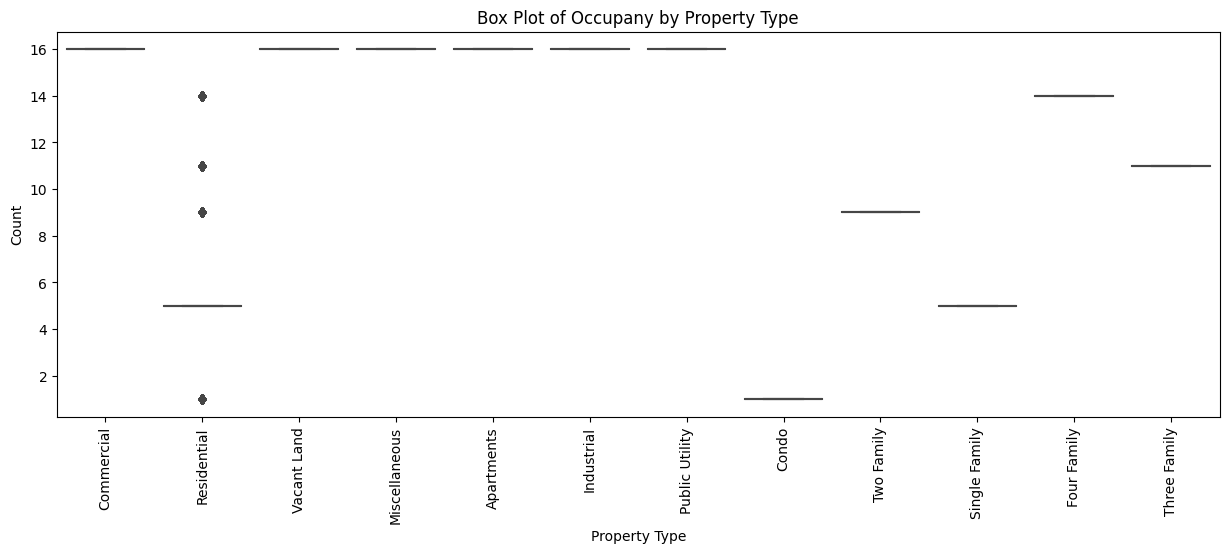

In [436]:
# Create box plots using seaborn
plt.figure(figsize=(15, 5))
sns.boxplot(x='Property Type', y='Minimum Estimated Occupancy', data=data)

# Set plot labels and title
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Box Plot of Occupany by Property Type')
plt.xticks(rotation= 90)
# Show the plot
plt.show()

In [437]:
#rename non-code as reason for transcation for property
data.rename(columns={'Non-Code': 'Reason for sale'}, inplace=True)

In [438]:
data.head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Reason for sale,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date,Street Number,Adults,Children,Minimum Estimated Occupancy
0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,Others,Others,2021,9,13,230,16,0,16
1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,Single Family,Others,2020,10,2,390,4,1,5
2,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,Condo,Others,2021,3,9,5,1,0,1
3,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,Single Family,Others,2021,4,13,111,4,1,5
4,2020,2021-07-02,Avon,862330.0,1447500.0,0.5957,Residential,Single Family,Others,2021,7,2,70,4,1,5


In [439]:
data.shape

(897081, 16)

In [440]:
data.columns

Index(['List Year', 'Date Recorded', 'Town', 'Assessed Value', 'Sale Amount',
       'Sales Ratio', 'Property Type', 'Residential Type', 'Reason for sale',
       'Date Recorded_Year', 'Date Recorded_Month', 'Date Recorded_Date',
       'Street Number', 'Adults', 'Children', 'Minimum Estimated Occupancy'],
      dtype='object')

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897081 entries, 0 to 997212
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   List Year                    897081 non-null  int64         
 1   Date Recorded                897081 non-null  datetime64[ns]
 2   Town                         897081 non-null  object        
 3   Assessed Value               897081 non-null  float64       
 4   Sale Amount                  897081 non-null  float64       
 5   Sales Ratio                  897081 non-null  float64       
 6   Property Type                897081 non-null  object        
 7   Residential Type             897081 non-null  object        
 8   Reason for sale              897081 non-null  object        
 9   Date Recorded_Year           897081 non-null  int32         
 10  Date Recorded_Month          897081 non-null  int32         
 11  Date Recorded_Date           89

In [442]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884233 entries, 0 to 997212
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   List Year                    884233 non-null  int64         
 1   Date Recorded                884233 non-null  datetime64[ns]
 2   Town                         884233 non-null  object        
 3   Assessed Value               884233 non-null  float64       
 4   Sale Amount                  884233 non-null  float64       
 5   Sales Ratio                  884233 non-null  float64       
 6   Property Type                884233 non-null  object        
 7   Residential Type             884233 non-null  object        
 8   Reason for sale              884233 non-null  object        
 9   Date Recorded_Year           884233 non-null  int32         
 10  Date Recorded_Month          884233 non-null  int32         
 11  Date Recorded_Date           88

In [443]:
884233-897081

-12848

In [444]:
12848/997213*100

1.2883907450063328

In [445]:
forecast_data = data[['List Year', 'Date Recorded', 'Sale Amount',
       'Date Recorded_Year', 'Date Recorded_Month', 'Date Recorded_Date']]

data.drop(columns= ['Date Recorded_Year', 'Date Recorded_Month', 'Date Recorded_Date', 'Adults', 'Children'], axis=1, inplace=True)
forecast_data.head()

,List Year,Date Recorded,Sale Amount,Date Recorded_Year,Date Recorded_Month,Date Recorded_Date
0,2020,2021-09-13,325000.0,2021,9,13
1,2020,2020-10-02,430000.0,2020,10,2
2,2020,2021-03-09,179900.0,2021,3,9
3,2020,2021-04-13,890000.0,2021,4,13
4,2020,2021-07-02,1447500.0,2021,7,2


In [446]:
data.to_csv('model_building_dataset.csv')
forecast_data.to_csv('forecasting_dataset.csv')

In [447]:
data.head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Reason for sale,Street Number,Minimum Estimated Occupancy
0,2020,2021-09-13,Ansonia,150500.0,325000.0,0.4630,Commercial,Others,Others,230,16
1,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,Single Family,Others,390,5
2,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,Condo,Others,5,1
3,2020,2021-04-13,Avon,619290.0,890000.0,0.6958,Residential,Single Family,Others,111,5
4,2020,2021-07-02,Avon,862330.0,1447500.0,0.5957,Residential,Single Family,Others,70,5


## Feature Enginnering & Extraction
### Following changes are : 
1. Serial No Dropping off
2. Date Recorded converted to datetime format
3. Street Number formed from address and dropping address as not required 
4. Sales Ratio ouliers are removed as 10 percent of original data
5. post cleaning found 12,000 missing values from address to save time, dropping uneccassary values as 1 % of original data
6. converrting residentail type to minimum occupany for property and dropping off residential type
7. street no extraction was as per planning department of USA which is a grid pattern 
8. residental type and property type was somewhat similar in nature to avoid multicollinearity, converted categorical into numerical data
9. assessor and OPM remarks are dropped off due to text and sentence formation not siginificant
10. non-use code is converted after close inspection as reason for sale features 
11. misisng value imputation for property type as miscellaneous, residential type and non-code are termed as others
12. longitudinal and latitude data is dropped at start, since geospatial data is not significant with respect to regression model while its similar features such as town and street no are available in dataset. 